<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60">
<center>
    <h1> IWG-101 - Introducción a la Ingeniería </h1>
    <h2> Complejidad Computacional </h2>
    <h2> Version: 1.00</h2>
</center>

<div id='tabla' />

# Tabla de contenido
* [Paquetes y librerias requeridas](#conda)
* [Objetivo de la actividad](#objetivo)
* [Complejidad Computacional](#complejidad_computacional)
* [big O](#big_O)
* [Breve introducción de la tarea](#intro_tarea)
* [**TAREA**](#tarea)
* [Código final entregado para visualizar la comparación](#codigo_final)

<div id='conda' />

# Paquetes y librerias requeridas. Se debe realizar previo a la ejecución del Jupyter Notebook.
* **Conda**: https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html . Este framework es crítico, luego de su instalación, todos los demás paquetes se instalan fácilmente!
* Jupyter Notebook: https://jupyter.org/install , es el segundo de la lista. Muy fácil de instalar con **conda**. Comando ```conda install -c conda-forge notebook```.
* NumPy: https://anaconda.org/anaconda/numpy , muy fácil de instalar con **conda**. Comando ```conda install -c anaconda numpy ```.
* MatPlotLib: https://anaconda.org/anaconda/matplotlib, muy fácil de instalar con **conda**. Comando ```conda install -c anaconda matplotlib ```.

In [4]:
# Library used to generate random numbers.
import numpy as np
# This library is used to generate nice plots.
import matplotlib.pyplot as plt
import matplotlib as mpl
# This lines define better values for output for font size in plots.
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
import random

<div id='objetivo' />

# Objetivo de la actividad
*(Volver a la [Tabla de contenidos](#tabla))*

Entender la importancia de la complejidad computacional de los algoritmos. En otras palabras, la importancia de la teoría en la práctica!

<div id='complejidad_computacional' />

# Complejidad Computacional
*(Volver a la [Tabla de contenidos](#tabla))*

En Informática utilizamos recurrentemente el término algoritmo, que se puede entender como la descripción de un procedimiento para resolver una tarea. Los algoritmos en si pueden ser muy diversos, incluso para resolver una misma tarea. Por ejemplo, si queremos ordenar números tenemos una gran cantidad de algoritmos que resuelven esa tarea, entre ellos podemos destacar Bubblesort y QuickSort (ver https://en.wikipedia.org/wiki/Sorting_algorithm). De lo cual surgen las siguiente preguntas: 

**¿De qué sirve tener distintos algoritmos para resolver la misma tarea?**

**¿Por qué seguimos construyendo algoritmos para resolver la misma tarea?**

La respuesta depende del contexto, pero una razón para seguir construyendo algoritmos para resolver una misma tarea es porque se quiere construir uno mejor a los existentes. El concepto de "mejor" también depende del contexto, pero el contexto que nos convoca ahora es la "Complejidad Computacional", que se relaciona con el tiempo que requerirá el algoritmo para su ejecución. A modo de ejemplo, consideremos el procedimiento "sorted" the Python, particularmente para ordenar números. En la siguiente celda se realiza un experimento computacional donde se mide el tiempo y luego se grafica. Los distintos tiempos que se muestran son para listas de diferente tamaño. El eje-x muestra el largo de la lista y el eje-y muestra el tiempo requerido en segundos, notar que la escala de los ejes utilizada en el gráfico de la izquierda es lineal y el de la derecha es logarítmica.

3.59 µs ± 32.8 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
6.37 µs ± 156 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
12.5 µs ± 531 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
27.4 µs ± 1.34 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
54.1 µs ± 951 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
109 µs ± 3.73 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
198 µs ± 5.32 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
366 µs ± 3.15 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
676 µs ± 9.3 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
1.17 ms ± 25.9 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)


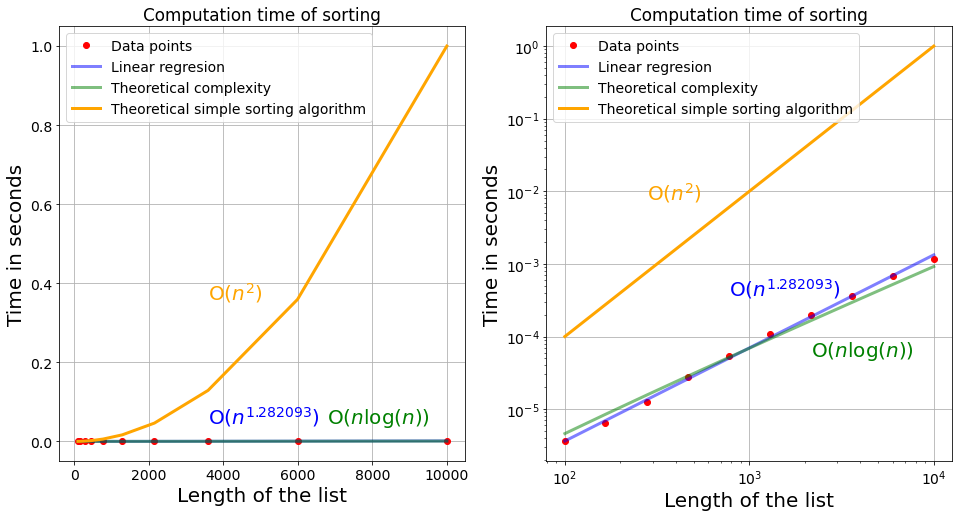

In [11]:
# Procedure to generate a random list of length "n".
def build_random_list_of_numbers(n):
    out = []
    random.seed(0)
    for i in range(n):
        out.append(random.randint(0,1e8))
    return out

# Number of lists to be used
N = 10
# List to store the computation times
ave_out_times = [0]*N
# Lenght of the list used in log-scale
Ns = np.logspace(2,4,N,dtype=np.int)
# Numerical experiment. It has two main components
# (i) Generate a list of length "n"
# (ii) Measure the time required to sort the list of length "n"
for i in range(N):
    n = Ns[i]
    #(i) Generate a list of length "n"
    list_of_numbers = build_random_list_of_numbers(n)
    # (ii) Measure the time required to sort the list of length "n"
    tmp_time = %timeit -n 100 -r 5 -o sorted(list_of_numbers)
    ave_out_times[i] = tmp_time.average

# Linear regresion to estimate complexity exponent
p_sort = np.polyfit(np.log10(Ns), np.log10(ave_out_times), 1)


##################################################
# Plotting using subplots
##################################################
plt.figure(figsize=(16, 8))
ax = plt.subplot(121)
##############################################################################
# Plotting in linear scale the computation time required for sorting numbers.
##############################################################################
plt.plot(Ns,ave_out_times,'r.',markersize=12,label='Data points')

plt.plot(Ns,10**(p_sort[1])*Ns**(p_sort[0]),'b-',label='Linear regresion',linewidth=3,alpha=0.5)
plt.text(Ns[-3],10**(-8)*Ns[-4]**2,r'O$(n^{%f})$' % (p_sort[0]),fontsize=20, color='Blue')

plt.plot(Ns,10**(-8)*Ns*np.log(Ns),'g-',label='Theoretical complexity',linewidth=3,alpha=0.5)
plt.text(0.8*Ns[-2]+0.2*Ns[-1],10**(-8)*Ns[-4]**2,r'O$(n \log(n))$',fontsize=20, color='Green')

plt.plot(Ns,10**(-8)*Ns**2,'-',label='Theoretical simple sorting algorithm',linewidth=3,color='orange')
plt.text(Ns[7],10**(-8)*Ns[-2]**2,r'O$(n^2)$',fontsize=20, color='Orange')

# Adding title and labels.
plt.title('Computation time of sorting')
plt.xlabel('Length of the list')
plt.ylabel('Time in seconds')

# Finishing up the plot.
plt.legend(loc='best')
plt.grid(True)

ax = plt.subplot(122)
##############################################################################
# Plotting in log-log scale the computation time required for sorting numbers.
##############################################################################
plt.loglog(Ns,ave_out_times,'r.',markersize=12,label='Data points')

plt.loglog(Ns,10**(p_sort[1])*Ns**(p_sort[0]),'b-',label='Linear regresion',linewidth=3,alpha=0.5)
plt.text(Ns[4],ave_out_times[-3],r'O$(n^{%f})$' % (p_sort[0]),fontsize=20, color='Blue')

plt.loglog(Ns,10**(-8)*Ns*np.log(Ns),'g-',label='Theoretical complexity',linewidth=3,alpha=0.5)
plt.text(Ns[-4],ave_out_times[-6],r'O$(n \log(n))$',fontsize=20, color='Green')

plt.loglog(Ns,10**(-8)*Ns**2,'-',label='Theoretical simple sorting algorithm',linewidth=3,color='orange')
plt.text(Ns[2],10**(-7)*Ns[2]**2,r'O$(n^2)$',fontsize=20, color='Orange')

# Adding title and labels.
plt.title('Computation time of sorting')
plt.xlabel('Length of the list')
plt.ylabel('Time in seconds')

# Finishing up the plot.
plt.legend(loc='best')
plt.grid(True)

plt.show()

En la celda anterior se realizaron $10$ experimentos numéricos para obtener la relación entre el tiempo de computación requerido para ordenar una lista vs la cantidad de elementos en la lista, es decir $n$. En donde se comparó la data obtenida (puntos rojos), una regresión lineal (en azul), la complejidad computacional teórica (en verde) y la complejidad computacional de un algoritmo de ordenamiento simple (en naranjo). El objetivo de la comparación anterior es mostrar numéricamente que uno puede ver verificar computacionalmente lo que la teoría sostiene.

La conclusión obtenida es que podemos "comparar" algoritmos en función del tiempo de computación requerido para la realización de la tarea encomendada. En este caso particular, en función del tamaño o largo del input. Específicamente, debemos introducir la notación *big-O* ya utilizada en el gráfico anterior.

<div id='big_O' />

# Notación *big-O*
*(Volver a la [Tabla de contenidos](#tabla))*

La notación *big-O* (https://es.wikipedia.org/wiki/Cota_superior_asintótica) se utiliza para describir el comportamiento asintótico del tiempo de computación requerido de un algoritmo, donde el concepto de asintótico se relaciona, en este caso, para valores *grandes* de $n$. Lo interesante de la complejidad computacional es que es independiente del lenguaje y máquina donde uno implementa/ejecuta el algoritmo, claramente habrán diferencias de tiempos de computación! pero la cantidad de operaciones serán las mismas. La diferencia de tiempos radica en que en un lenguaje o máquina algunas operaciones podrán ser más rápidas o más lentas, pero lo que estudiamos acá es la cantidad de operaciones.

El único cuidado que hay que tener para observar la complejidad computacional numéricamente es la magnitud del $n$ a utilizar, ya que si es muy pequeño, los costos fijos de la computación serán muy significativos y el experimento será no concluyente. Lo otro que hay que tener cuidado, son la comparación de experimentos entre distintas máquinas, ya que dependiendo del hardware utilizado, podrán ser distintos por lo explicado antes.

Ahora, volviendo a la notación *big-O*, en el caso de los algoritmos de ordenamiento de número vimos en el gráfico anterior que la data es más cercana a la curva O$(n\,\log(n))$ y O$(n^\alpha)$, donde $\alpha$ es aproximadamente $1.2730$ (puede variar de máquina en máquina!), que a la complejidad O$(n^2)$. Por lo cual concluimos que el algoritmo que implementa "sorted" es bastante bueno! Recuerde que O$(n\,\log(n))$ es el óptimo teórico!

**¿Qué indica *big-O* entonces?**

La notación *big-O* temporal caracteriza, como indicado antes, el tiempo de computación requerido para realizar una tarea. El cual, para algunos casos, lo podemos denotar como $T \approx C\,n^\alpha$, donde $T$ es el tiempo total requerido de computación, la variable $n$ es el "tamaño" del problema, $\alpha$ es el exponente y $C$ es una constante. Particularmente $C$ captura la variación del tiempo de ejecución de distintas operaciones entre diferentes máquinas. Por ejemplo si un computador es más rápido que otro, tendrá un $C$ menor.

Dependiendo de la tarea que resuelve cada uno, tenemos distintos tipos complejidades, a continuación presentamos algunos ejemplos de complejidad y la tarea realizada: 
- O$(1)$: modificar el valor de una lista
- O$(n)$: sumar una lista de números
- O$(n\,\log(n))$, obtener la transformada de Fourier
- O$(n^2)$, multiplicar una matriz por un vector
- O$(n^3)$, resolver un sistema de ecuaciones lineales
- O$(n!)$, problemas combinatoriales, pueden demorar milenios!
- O$(n^n)$, ni lo pienses!
- Otros peores!

Claramente podemos considerar que un algoritmo O$(1)$ se demorará menos que un algoritmo O$(n^2)$, y así sucesivamente. Además, en general, la complejidad un algoritmo no tiene porque ser de la forma O$(n^\alpha)$, sin embargo los detalles de como obtener la complejidad teórica de un algoritmo se verán en cursos superiores. Acá, por simplicidad, solo queremos analizar numéricamente el caso O$(n^\alpha)$.

**¿Por qué vimos antes el gráfico de la data es escala lineal y escala logaritmica?**

Al visualizar este tipo de data, se observa que al utilizar en escala lineal no queda muy claro el comportamiento de los algoritmos, o mejor dicho, el comportamiento asintótico de ellos. Por esta razón la escala logarítmica es recomendada, la razón es simple. En el caso del tiempo de computación, podemos aplicar logaritmo en base 10 (aunque cualquier base funciona!) a la ecuación $T \approx C\,n^\alpha$ y obtenemos:
\begin{align*}
\log (T) & \approx \log(C\,n^\alpha)\\
         & \approx \log(C)+\log(n^\alpha)\\
         & \approx \log(C)+\alpha\,\log(n).\\
\end{align*}
Lo que nos indica que la pendiente de la "recta" obtenida en la escala logaritmica será el exponente $\alpha$! Lo cual es muuuuuucho más simple de analizar que haber utilizado en gráfico en escala lineal. Por esta razón, ahora continuaremos con escala logarítmica.

<div id='intro_tarea' />

# Breve introducción de la tarea
*(Volver a la [Tabla de contenidos](#tabla))*

La tarea encomendada a desarrollar sera el estudio de la complejidad computacional de multiplicar números enteros. Los 2 algoritmos que compararemos serán los siguientes:
1. (Algoritmo 1) El producto de números enteros aprendido en el colegio.
2. (Algoritmo 2) El producto de números enteros utilizado por Python en el operador "*".
En este caso la variable $n$ utilizada será la cantidad de dígitos que tiene un número entero. Para la ejecución de la tarea se proveen las siguientes funciones:

In [12]:
# This procedure generate an integer of "integer_length" number of 
# digits. The variable "seed" is used to generate different random
# numbers, so to generate different integers it is important
# to change the "seed". If we want to generate the same number
# we just repect the seed.
def generate_list_of_digits(integer_length, seed=0):
    np.random.seed(seed)
    ld = []
    ld.append(np.random.randint(1,9))
    for j in range(1,integer_length):
        ld.append(np.random.randint(1,9))
    return ld

# This procedure converts the list of digits "ld" into an integer
# considering the following interpretation:
# out = \sum_{i=0}^len(ld) ld[i]*10**i.
def list_of_digits_to_integer(ld):
    m=len(ld)
    out = 0
    for j in range(m):
        out +=int(ld[j])*int(10**j)
    return out

# This procedure translate an integer "i" to a list where
# the digits are stored in its components.
def integer_to_list_of_digits(i):
    ld=list(map(int,str(i)))[::-1]
    return ld

# This procedure performs the "direct product" of integers that
# is taught is high school. The input is two integers in their 
# list format. The output must be a list
def direct_product_of_list_of_digits(ld1,ld2):
    # This is the code you need to build!!
    # The following implementation is included so you can
    # see the plotting part working. Notice that the output
    # is not correct, it is used so it spend computation
    # time to be then considered in the plot.
    i1 = list_of_digits_to_integer(ld1)
    i2 = list_of_digits_to_integer(ld2)
    ld_out = [0]
    for i in range(min(len(ld1),len(ld2))):
        ld_out[0] += ld1[i]*ld2[i]
    return ld_out

# This procedure just check if the procedure "procedure_built" compute
# correctly the product of two integers.
def check_if_list_of_digits_product_is_correct(procedure_built):
    flag = True
    # We just picked 10 arbitrarily here.
    for i in range(10):
        ld1 = generate_list_of_digits(10*i+1, seed=i)
        ld2 = generate_list_of_digits(10*i+1, seed=i**2)
        ld_out = procedure_built(ld1,ld2)
        if list_of_digits_to_integer(ld1)*list_of_digits_to_integer(ld2)!=list_of_digits_to_integer(ld_out):
            flag = False
            break
    return flag

## A continuación se describen las funciones entregadas:

In [13]:
# Esta función genera un número como una lista de dígitos.
ld=generate_list_of_digits(integer_length=5)
print(ld)

[5, 8, 6, 1, 4]


In [14]:
# Esta función convierte una lista de dígitos "ld" a un número entero.
i = list_of_digits_to_integer(ld)
# Note que la interpretación es la siguiente en este ejemplo con 5 dígitos:
# i=ld[0]+ld[1]*10+ld[2]*10**2+ld[3]*10**3+ld[4]*10**4 <-- IMPORTANTE!!!
print(i)

41685


In [15]:
# Esta función convierte un entero a una lista de dígitos en el mismo formato descrito anteriormente. 
ld_new = integer_to_list_of_digits(i)
print(ld_new)

[5, 8, 6, 1, 4]


In [16]:
# Genera un entero de 10 dígitos
ld1=generate_list_of_digits(integer_length=10)
# Genera un entero de 10 dígitos distinto al anterior, esto se logra cambiando la semilla "seed"
ld2=generate_list_of_digits(integer_length=10, seed=1)
#############################################################################
#############################################################################
# IMPORTANTE!!!!!!!!!!!
# Esta es la función en donde usted debe implementar el producto de 2
# números enteros almacenados en formato de lista en las variables
# ld1 y ld2. Lo que está actualmente implementado es solo un código 
# particular que no realiza la tarea solicitada.
#############################################################################
#############################################################################
ld_out = direct_product_of_list_of_digits(ld1,ld2)

In [17]:
# Luego de haber implementado el producto de 2 números enteros
# en un formato de lista, se comparte esta función para que
# verifique que efectivamente su implementación realizada en "direct_product_of_list_of_digits"
# hace lo que se le pide. Si el output es "False", hay un problema
# con su implementación, pero si el producto es "True", su
# implementación es "correcta". Se agregan comillas a "correcta",
# porque lo que en rigor hace la función "check_if_list_of_digits_product_is_correct"
# es ejecutar un par de ejemplo y si funciona, se considera correcto.
check_if_list_of_digits_product_is_correct(direct_product_of_list_of_digits)

False

<div id='tarea' />

# TAREA
*(Volver a la [Tabla de contenidos](#tabla))*

La tarea a desarrollar es la implementación de ```direct_product_of_list_of_digits```, el código actual en la función fue solo incluido para que el [código final](#codigo_final) en las siguientes celdas se ejecutara y mostrara el gráfico respectivo. 

La implementación del algoritmo debe ir realizando el producto dígito a dígito, tal cual uno lo estudió en el colegio, por esta razón se entregan los números enteros en listas, así es más fácil su indexación. Se le sugiere analizar bien su algoritmo antes de implementarlo para que no vaya a utilizar mucha memoria.

Luego de la implementación y verificación de su código con la función ```check_if_list_of_digits_product_is_correct```, usted debe ejecutar el [código final](#codigo_final) y determinar la complejidad computacional de su implementación y compararla con la complejidad computacional del producto.

En resumen, usted debe:
1. Implementar el productor de enteros ```direct_product_of_list_of_digits```
2. Verificar su implemenatción con ```check_if_list_of_digits_product_is_correct```
3. Ejecutar [código final](#codigo_final)
4. Indicar la complejidad de su implementación y la de Python.

<div id='codigo_final' />

# Código final entregado para visualizar la comparación
*(Volver a la [Tabla de contenidos](#tabla))*

La comparación corresponde a su implementación del Algoritmo 1, producto de números enteros visto en el colegio, y el Algoritmo 2, algoritmo utilizado por Python. Solo debe ejecutarlo luego que haya terminado la implementación correcta de la función ```direct_product_of_list_of_digits```.


Experiment:  0
28 µs ± 1.99 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
198 ns ± 4.39 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  1
60.1 µs ± 2.33 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
457 ns ± 15.5 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  2
95.4 µs ± 3.46 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
932 ns ± 86.1 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  3
133 µs ± 6.31 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
1.41 µs ± 87.7 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  4
167 µs ± 4.63 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
2.52 µs ± 997 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  5
208 µs ± 5.61 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
3.5 µs ± 1.13 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)

Experiment:  6
251 µs ± 8.38 µs per loop (mean ± 

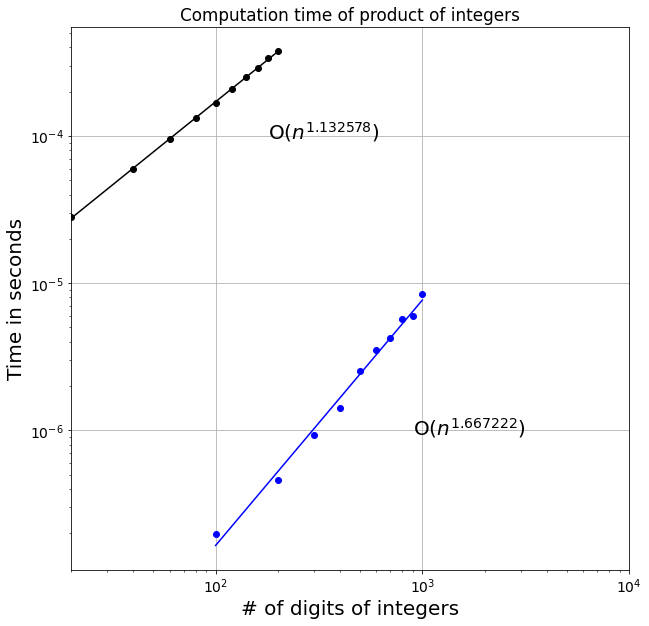

In [18]:
########################################################################
# This cell performs the numerical experimenet of computing the product
# of integers numbers.
########################################################################

# Number of experiments
N = 10

# List to store output times
out_times_dp = [0]*N
out_times_py = [0]*N

# Lambda functions to define the number of digits used by the product procedure.
# We have defined a greater number of digits for the Python product since it is
# much better than our direct-product implementation.
n_digits_dp = lambda i: 20*(1+i)
n_digits_py = lambda i: 100*(1+i)

# Loop over the list fo experiments
for i in range(N):
    # Just to show which experiments is actually being computed.
    print('\nExperiment: ',i)
    
    ##########################################
    # Direct product experiment:
    ##########################################
    # Generating an integer with "n_digits_dp(i)" digits.
    ld_dp = generate_list_of_digits(n_digits_dp(i), i)
    # Computing the actual direct product implemented and storing it in "out_times_dp[i]".
    out_times_dp[i] = %timeit -n 100 -r 5 -o direct_product_of_list_of_digits(ld_dp,ld_dp)
    
    ##########################################
    # Python product experiment:
    ##########################################
    # Generating an integer with "n_digits_py(i)" digits.
    ld_py = generate_list_of_digits(n_digits_py(i), i)
    # Translating from a list of integers to an actual integer.
    ild = list_of_digits_to_integer(ld_py)
    # Computing the actual product in Python and storing it in "out_times_py[i]".
    out_times_py[i] = %timeit -n 100 -r 5 -o ild*ild

########################################################################
# This cell plots the output obtained in the previous cell.
########################################################################

# Initializing lists that will be used to stored the average computation time
ave_out_times_dp = [0]*N
ave_out_times_py = [0]*N
# Recovering the average computation time for each experiment and storing it 
# in "ave_out_times_dp" and "ave_out_times_py", respectively.
for i in range(N):
    ave_out_times_dp[i] = out_times_dp[i].average
    ave_out_times_py[i] = out_times_py[i].average

# Building the length of each digit used in the direct product experiments.
# The list of lengths are stored in the variable "Ns_dp".
Ns_dp = n_digits_dp(np.arange(10))
# Here we perform a least square regression to obtain the computational
# complexity coefficients requiered later. Don't worry to understand
# this now, you will have enough time to learn it later!
p_dp = np.polyfit(np.log10(Ns_dp), np.log10(ave_out_times_dp), 1)

# Building the length of each digit used in the Python product experiments.
# The list of lengths are stored in the variable "Ns_py".
Ns_py = n_digits_py(np.arange(10))
# Linear regression, same comment as before applies.
p_py = np.polyfit(np.log10(Ns_py), np.log10(ave_out_times_py), 1)

# Plotting initializations required.
plt.figure(figsize=(10,10))
plt.xlim(min(Ns_dp),10**4)

# Plotting in log-log scale the direct product data.
plt.loglog(Ns_dp,ave_out_times_dp,'k.',markersize=12)
plt.loglog(Ns_dp,10**(p_dp[1])*Ns_dp**(p_dp[0]),'k-')
#plt.text(Ns_dp[-2],ave_out_times_dp[2],r'$%f\,n^{%f}$' % (10**p_dp[1],p_dp[0]),fontsize=20)
plt.text(Ns_dp[-2],ave_out_times_dp[2],r'O$(n^{%f})$' % (p_dp[0]),fontsize=20)

# Plotting in log-log scale the Python product data.
plt.loglog(Ns_py,ave_out_times_py,'b.',markersize=12)
plt.loglog(Ns_py,10**(p_py[1])*Ns_py**(p_py[0]),'b-')
#plt.text(Ns_py[-2],ave_out_times_py[2],r'$%f\,n^{%f}$' % (10**p_py[1],p_py[0]),fontsize=20)
plt.text(Ns_py[-2],ave_out_times_py[2],r'O$(n^{%f})$' % (p_py[0]),fontsize=20)

# Adding title and labels.
plt.title('Computation time of product of integers')
plt.xlabel('# of digits of integers')
plt.ylabel('Time in seconds')

# Finishing up the plot.
plt.grid(True)
plt.show()